ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **20Oct20**

# Laboratory Work 08 (22Oct20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Your Name`

### Rubric for each assignment: 

|      Context          |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

---
## Table of Contents<a id="toa"></a>
* [Assignment 1 (95 pts)](#a1) Reaction rates for silicon vapor deposition.
 - [1.1)](#a11)(10 pts) Import reaction mechanism.
 - [1.2)](#a12)(10 pts) Species and stoichiometric data.
 - [1.3)](#a13)(15 pts) Compute the rank of $\Smtrx$.
 - [1.4)](#a14)(30 pts) Compute reaction rates for given production rates; explain.
 - [1.5)](#a15)(30 pts) Provide a species production vector that allows for a unique reaction rate vector. Prove that the reaction rate vector is unique and explain.
* [Assignment 2 (5 pts)](#a2) 
---

## <span style="color:blue">[Assignment 1 (95 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(10 pts) Import the following reaction mechanism for acetaldehyde pyrolysis from the course repository `data/acetaldehyde-pyrolysis-rxn.txt` and display the reactions.</span><a id="a11"></a>

In [3]:
import io 
finput = ('data/acetaldehyde-pyrolysis-rxn.txt', 'rt')

!cat 'data/acetaldehyde-pyrolysis-rxn.txt'
reactions_mech = list()

for line in finput:
    list_line = line.strip()
    
    if list_line[0] == '#': continue 
    if list_line[:2] == '..': continue 
    
    reactions_mech.append(list_line.split(':')[0])
finput.close()

for r in reactions_mech:
    i = reactions_mech.index(r)
    print ('r%s'%r, ':', r)
print('# of reactions:', len(reactions_mech))

cat: data/acetaldehyde-pyrolysis-rxn.txt: No such file or directory


AttributeError: 'tuple' object has no attribute 'close'

In [2]:
import io

finput = open('http://localhost:8888/edit/acetaldehyde-pyrolysis-rxn.txt#','rt')
#!cat 'data/water-gas-shift-rxn.txt'
reactions = list()

for line in finput:
    stripped_line = line.strip()
    if stripped_line[0] == '#': continue
    if stripped_line[:2] == '..': continue
        
    reactions.append( stripped_line.split(':')[0] )
    
finput.close()
    
for r in reactions: 
    i = reactions.index(r)
    print('r%s'%i,': ',r)
print('# of reactions:', len(reactions_mech))


FileNotFoundError: [Errno 2] No such file or directory: 'http://localhost:8888/edit/acetaldehyde-pyrolysis-rxn.txt#'

In [1]:
'''1.1) Import reaction mechanism'''


r0 :  I2 <=> 2 I
r1 :  I + CH3CHO <-> HI + CH3CO
r2 :  CH3CO <-> CH3 + CO
r3 :  CH3 + I2 <=> CH3I + I
r4 :  CH3 + HI <-> CH4 + I
n_reactions = 5


### <span style="color:blue">[1.2)](#toa)(10 pts) Make an organized output of the species and stoichiometric data.
</span><a id="a12"></a>

In [5]:
'''1.2) Species and stoichiometric data'''
def stoich_data(r):
    double_ = r.split('<=>')
    if len(double) > 1:
        
        left = double_[0].strip()
        right= double_[1].strip()
        
    else:
        single_= r.split('<->')
        left = single_[0].strip()
        right = single_[1].strip()
        
    return(left, right)

species_tmp= list()
for r in reactions:
    (left, right) = stoich_data(r)
    
    left_terms = left.split('+')
    right_terms = right.split('+')
    
    terms = [t.strip() for t in left_terms] + [t.strip() for t in right_terms]
    
    for i in terms:
        
        assert len(tmp)==1 or len(tmp)==2,' terms = %r, i = %r, tmp = %r '%(terms,i,tmp)
            
        if len(tmp) == 2:
            species_tmp.append( tmp[1].strip() )
        
        else:
            species_tmp.append( i.strip() )

species = list(set(species_tmp))
print('\nspecies =\n',species)
print('# of species =',len(species))


NameError: name 'reactions' is not defined

In [6]:
import numpy as np
s_mtrx = np.zeros((len(reactions),len(species)))
for r in reactions:
    i_row = reactions.index(r)
    left  = r.split('<->')[0].strip()
    right = r.split('<->')[1].strip()
    left_terms = left.split('+')
    left_terms = [t.strip() for t in left_terms]
    right_terms = right.split('+')
    right_terms = [t.strip() for t in right_terms]
    
    for t in left_terms:
        tmp = t.split(' ')
        if len(tmp) == 2:
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = -1.0 * coeff
        else:
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = -1.0

    for t in right_terms:
        tmp = t.split(' ')
        if len(tmp) == 2:
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = 1.0 * coeff
        else:
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = 1.0

print('m x n =',s_mtrx.shape)
print('s_mtrx =\n',s_mtrx)
from chen_

NameError: name 'reactions' is not defined

### <span style="color:blue">[1.3)](#toa)(15 pts) Compute the rank of the stoichiometric matrix using your own algorithm.</span><a id="a13"></a>

S shape =  (5, 9)
rank(S) = 5


In [ ]:
import numpy as np
s_mtrx = np.zeros((len(reactions),len(species)))
for r in reactions:
    i_row = reactions.index(r)
    left  = r.split('<->')[0].strip()
    right = r.split('<->')[1].strip()
    left_terms = left.split('+')
    left_terms = [t.strip() for t in left_terms]
    right_terms = right.split('+')
    right_terms = [t.strip() for t in right_terms]
    
    for t in left_terms:
        tmp = t.split(' ')
        if len(tmp) == 2:
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = -1.0 * coeff
        else:
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = -1.0

    for t in right_terms:
        tmp = t.split(' ')
        if len(tmp) == 2:
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = 1.0 * coeff
        else:
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = 1.0

print('s shape= ',s_mtrx.shape)
print('s_mtrx =\n',s_mtrx)
print ('rank =',s_mtrx.rank() 

### <span style="color:blue">[1.4)](#toa) Given the following productions rate vector [mol/(s cc)],
</span>

<br>

<span style="color:blue">
$\gvec = \begin{pmatrix}
 -2.772 \\
 1.35 \\
 0.692 \\
 -2.37 \\
 -2.266 \\
 -2.476 \\
 0.124  \\
 -1.486 \\
 -0.553 
 \end{pmatrix}
$
</span>

<br>

### <span style="color:blue">for the species:</span>

<br>

 <span style="color:blue">
      I, CH3CO, HI, CO, CH3I, CH3CHO, I2, CH4, CH3,
 </span>  
 
<br>

### <span style="color:blue">compute the reaction rates vector and make a plot. Use your own algorithms and explain your work, that is, what is the meaning of your computed reaction rate vector? What problem are you solving to obtain the reaction rate vector from the given production rate vector? Do the production rate equations have a solution? If so, is it unique? Why or why not?</span><a id="a14"></a>

In [ ]:
g_dict = dict()

g_dict["I"] = -2.772
g_dict["CH3CO"] =  1.35
g_dict["HI"] =  0.692
g_dict["CO"] = -2.37
g_dict["CH3I"] =  -2.266
g_dict["CH3CHO"] = -2.476
g_dict[ "I2"] = 0.124
g_dict["CH4"] = -1.486
g_dict["CH3"] = -0.55

for spc in species:
    g_vec[species.index(spc)] = g_dict[spc]

a_mtrx = stoich_mtrx @ stoich_mtrx.transpose()

In [ ]:
'''1.4) Compute a reaction rates vector'''


reaction rates r_vec = [0.174, 0.898, -1.715, -1.205, -0.563]

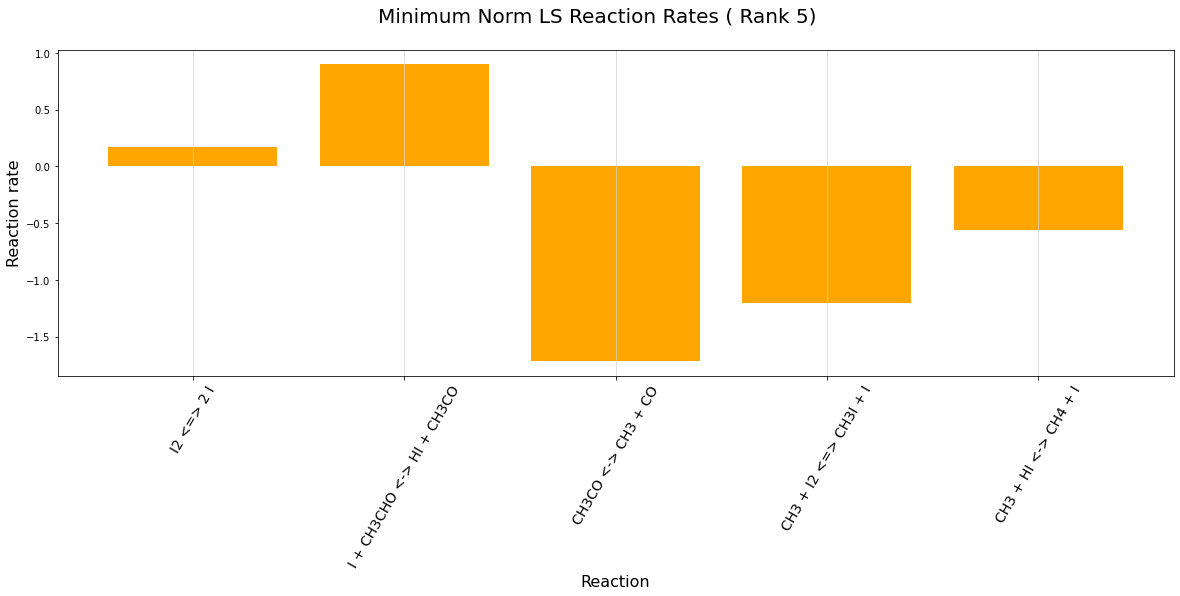

In [6]:
'''1.4) Plot of reaction rates'''


**Explanation:**

### <span style="color:blue">[1.5)](#toa) Find a production rate vector $\gvec$ for which the problem 

<br>
    
<span style="color:blue">    
\begin{equation*}
\Smtrx^\top\,\rvec = \gvec
\end{equation*}
</span> 

### <span style="color:blue">is unique, and verify the uniqueness of this reaction rate. Explain your work.</span><a id="a15"></a>

In [ ]:
'''1.5) Find production rates for unique reaction rates'''


**Explanation:**

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>